 # OBJECTIVE:
By the end of the lesson, students will be able to…


1- be aware of what is exploratory data analysis, its importance before later steps in data analysis.

2- Know the steps of exploratory data analysis , and have a good command of how to do them using python.

3- get a brief background about the statistical concept behind each step.

4 - Know what is the most convinient graph according to variable types (scale, ordinal , and nominal) and to what we want to know from the graph.




# INTRODUCE TOPIC

### exploratory data analysis is an approach to analysing data to summarise their main characteristics, often with visual methods.
### in other words, we perform analysis on data that we collected, to find important metrics/features by using some nice and pretty visualisatitons.

A- We start with univariate analysis, by which we  have summary about each variable know the basic characteristics of each variable, distribution (which helps us to validate normality assumption regarding DEPENDENT variables) , skewness , precense of outliers and missing values , .... etc.

B- then we make bivariate analysis to see the relationship between each variable in the dataset and the target variable of interest (to help us to choose most important features to  include in model) or  using 2 variables and finding realtionship between them to make sure that there is no colinearity ( which means that one predictor variable in a multiple regression model can be linearly predicted from the others) which violates an importent assumption of regression.


C- Multivariate analysis : is performed to understand interactions between different fields in the dataset (or) finding interactions between variables more than 2

D- Model building : this is where ML comes into picture, we will use a simple linear regression model.

#Explain Skill 

we will use a brief case study to demonstrate concepts above

## Loading Data

### First : We load necessary  libraries 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [0]:

from sklearn.linear_model import LinearRegression



In [0]:
from scipy import stats

In [0]:
from scipy.stats import ttest_ind

In [0]:
import statsmodels.api as sm


### Then we load data

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


More info about dataset and columns describtion in the below link:

https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/wineQualityInfo.txt&sa=D&ust=1578814454588000

In [0]:
data=pd.read_csv('/content/drive/My Drive/wineQualityWhites.csv')

In [8]:
data.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [0]:
data.drop(columns=['Unnamed: 0'] , inplace=True)

This tidy data set contains 4,898 white wines with 11 variables on quantifying the chemical properties of each wine. At least 3 wine experts rated the quality of each wine, providing a rating between 0 (very bad) and 10 (very excellent).

###quick summary on data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed.acidity           4898 non-null float64
volatile.acidity        4898 non-null float64
citric.acid             4898 non-null float64
residual.sugar          4898 non-null float64
chlorides               4898 non-null float64
free.sulfur.dioxide     4898 non-null float64
total.sulfur.dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed.acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile.acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric.acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual.sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free.sulfur.dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total.sulfur.dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


basicly we see that variables are all numeric including scale variables like alcohol,density and almost all regressors and our dependent variable (quality) which is ordinal the most important effectors as will be proven later are alcohol , density , chlorides 

## Univariate Plots Section


### 1-Quality

We start with our dependent variable (Quality) to know more about its distribution 

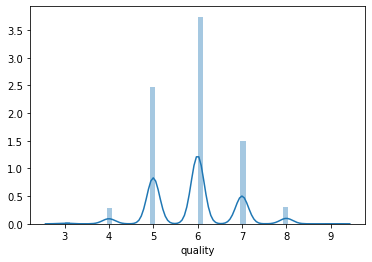

In [60]:
sns.distplot(data['quality'])

it is clear that the distribution is almost like normal  no need to transformation we see that the largest frequency is for quality of 6 and the second largest is 4 so we can state that quality is slightly skewed to right let’s check other key variables that may cause the effect

#### quality summary and table


In [13]:
data['quality'].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

we state that the distribution of quality is symmetric almost not needing any transformation but breaking by density we see that at the lowest density gets skewed to left indicating more quality and the reverse is in case of highest density makes quality lesser this is also assured by the significant negative correlation coeffecient , we also see that only lesser cases have quality less than 5

###2-Alcohol

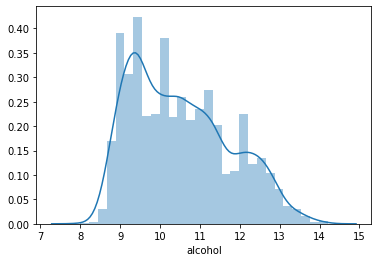

In [15]:
sns.distplot(data['alcohol'])

Almost like normal with a little skewness to the right.

In [16]:
data['alcohol'].describe()

count    4898.000000
mean       10.514267
std         1.230621
min         8.000000
25%         9.500000
50%        10.400000
75%        11.400000
max        14.200000
Name: alcohol, dtype: float64

###3 - Density

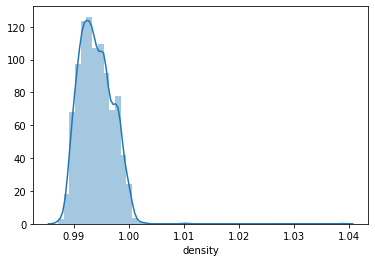

In [17]:
sns.distplot(data['density'])

In [18]:
data['density'].describe()

count    4898.000000
mean        0.994027
std         0.002991
min         0.987110
25%         0.991723
50%         0.993740
75%         0.996100
max         1.038980
Name: density, dtype: float64

almost symmetric almost all cases have density less than 1


then we do the same for all remaining columns : 

distribution and describtion of fixed.acidity
AxesSubplot(0.125,0.125;0.775x0.755)


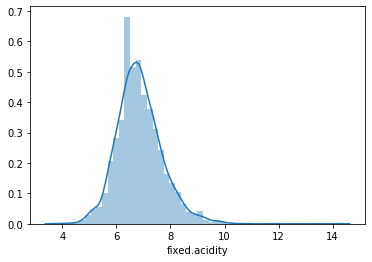

count    4898.000000
mean        6.854788
std         0.843868
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max        14.200000
Name: fixed.acidity, dtype: float64
    
___________________
distribution and describtion of chlorides
AxesSubplot(0.125,0.125;0.775x0.755)


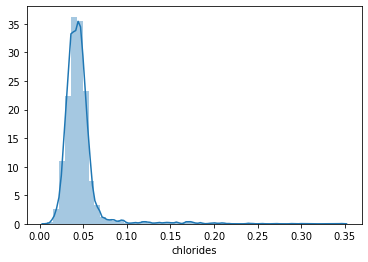

count    4898.000000
mean        0.045772
std         0.021848
min         0.009000
25%         0.036000
50%         0.043000
75%         0.050000
max         0.346000
Name: chlorides, dtype: float64
    
___________________
distribution and describtion of sulphates
AxesSubplot(0.125,0.125;0.775x0.755)


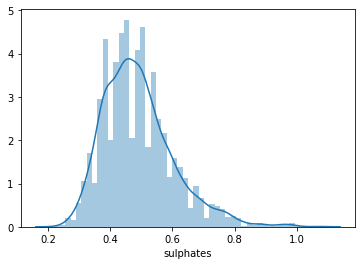

count    4898.000000
mean        0.489847
std         0.114126
min         0.220000
25%         0.410000
50%         0.470000
75%         0.550000
max         1.080000
Name: sulphates, dtype: float64
    
___________________
distribution and describtion of citric.acid
AxesSubplot(0.125,0.125;0.775x0.755)


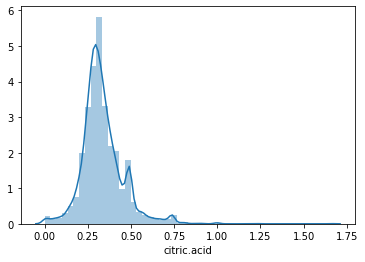

count    4898.000000
mean        0.334192
std         0.121020
min         0.000000
25%         0.270000
50%         0.320000
75%         0.390000
max         1.660000
Name: citric.acid, dtype: float64
    
___________________
distribution and describtion of free.sulfur.dioxide
AxesSubplot(0.125,0.125;0.775x0.755)


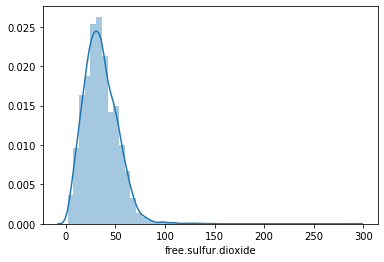

count    4898.000000
mean       35.308085
std        17.007137
min         2.000000
25%        23.000000
50%        34.000000
75%        46.000000
max       289.000000
Name: free.sulfur.dioxide, dtype: float64
    
___________________
distribution and describtion of residual.sugar
AxesSubplot(0.125,0.125;0.775x0.755)


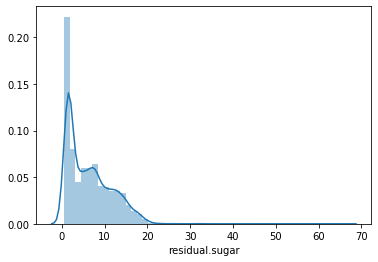

count    4898.000000
mean        6.391415
std         5.072058
min         0.600000
25%         1.700000
50%         5.200000
75%         9.900000
max        65.800000
Name: residual.sugar, dtype: float64
    
___________________
distribution and describtion of pH
AxesSubplot(0.125,0.125;0.775x0.755)


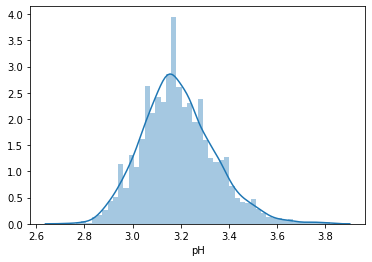

count    4898.000000
mean        3.188267
std         0.151001
min         2.720000
25%         3.090000
50%         3.180000
75%         3.280000
max         3.820000
Name: pH, dtype: float64
    
___________________
distribution and describtion of total.sulfur.dioxide
AxesSubplot(0.125,0.125;0.775x0.755)


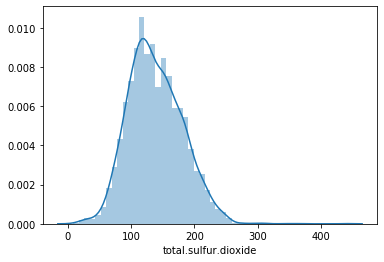

count    4898.000000
mean      138.360657
std        42.498065
min         9.000000
25%       108.000000
50%       134.000000
75%       167.000000
max       440.000000
Name: total.sulfur.dioxide, dtype: float64
    
___________________
distribution and describtion of volatile.acidity
AxesSubplot(0.125,0.125;0.775x0.755)


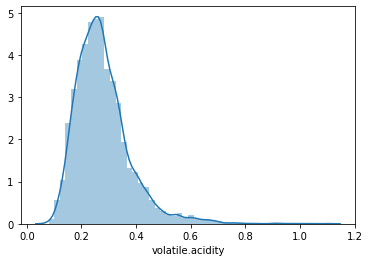

count    4898.000000
mean        0.278241
std         0.100795
min         0.080000
25%         0.210000
50%         0.260000
75%         0.320000
max         1.100000
Name: volatile.acidity, dtype: float64
    
___________________


In [19]:
for i in list (set(data.columns) - set(['alcohol','density','quality'])):
  print ('distribution and describtion of ' + i)
  print(sns.distplot(data[i]))
  plt.show()
  print(data[i].describe())
  print ('    ')
  print('___________________')



#### We notice the following : 

1-  regarding  fixed,volatile,and,citric_acid  notice the large difference between Q3 and but if we exclude outliers , we find them almost symmetric


2- free.sulfur.dioxide is slightly skewed to right also has outliers 

3 - chlorides is skewed to right first notice the large difference between Q3 and maximum indicating LARGE outliers 

4- total.sulfur.dioxide is almost symmetric with little skewness to the right we here notice the large difference between max and Q3 indicating presence of outliers.

5 - regarding residual.sugar first notice the large difference between Q3 and maximum




### General notes regarding univariate analysis.

Basicly we see that variables are all numeric including scale variables like alcohol,density.

Also almost all regressors and our dependent variable (quality) which is ordinal
the most important effectors as will be proven later are alcohol , density , chlorides .

We then generate some quantile variables for scale variables
like quality , density and alcohol to break box plots with
as shown above we find that almost all variables perhaps except quality and
quality, alcohol have sharply skewed distribution also some variables like fixed , volinate and citric
acid and chlorides and free/ total sulfur dioxide have large outliers

## Bivariate Plots Section


### we first make a scatterplot matrix  regarding correlation coeffecient between variables 

In [0]:
from scipy.stats import pearsonr

In [0]:
def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

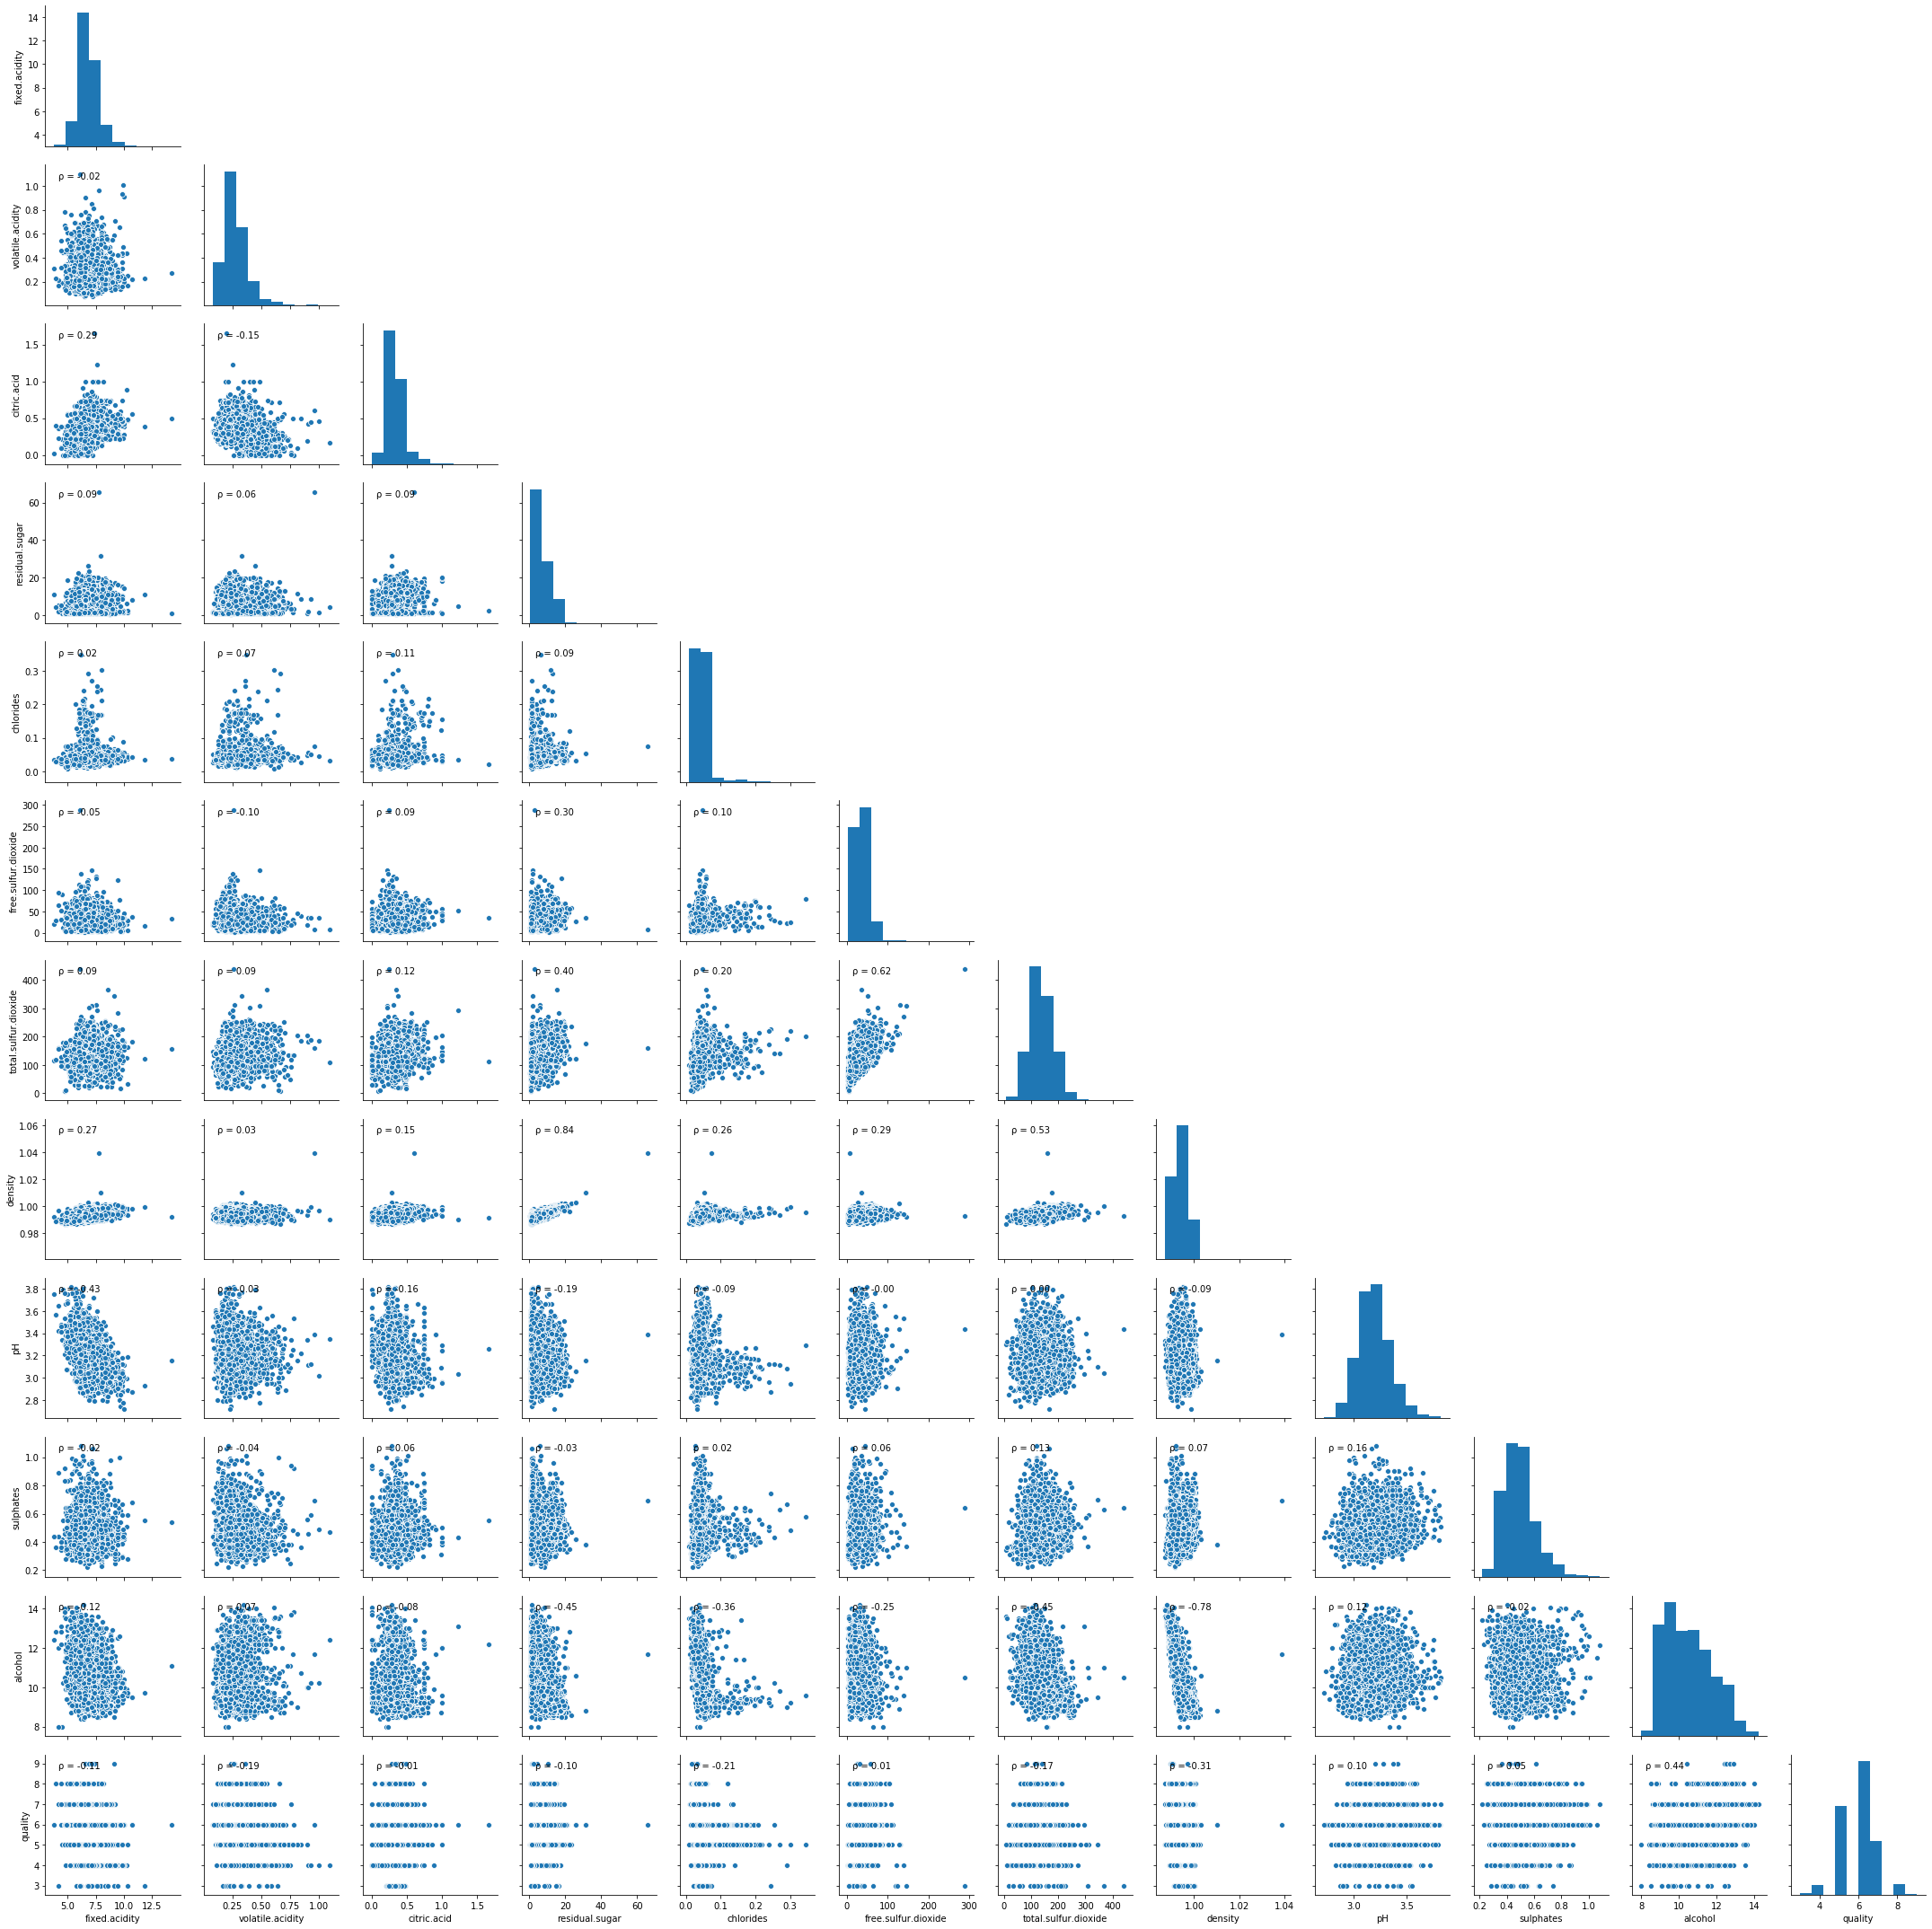

In [22]:
g = sns.pairplot(data, )
g.map_lower(corrfunc)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
plt.show()

from the above pairplot we find that the following pairs of variables that have acceptable correlation coeffecients

quality vs alchohol = 0.44

quality vs density = -0.31


quality vs chlorides = -0.21

alcohol vs  residual.sugar = -0.451

alcohol vs  chlorides =-0.36

alcohol vs  total.sulfur.dioxide =-0.449

alcohol vs  density = -0.78

pH vs  fixed.acidity = -0.426

density vs  residual.sugar=0.839

density vs  total.sulfur.dioxide = 0.249

total.sulfur.dioxide vs  residual.sugar = 0.401

chlorides vs  density = 0.257


then let’s get more deep into relation between each pair separately


### first we start with our main variable (quality) and most effectors on it we find that the largest 2 absolute coeffecients with quality are of alcohol and density first we check of alcohol

#### 1- quality_vs_Alcohol_box_plot


we plot bosplot for alcohol as per quality range , we divide quality into 5 intervals 

In [0]:
data['quality_interval']=pd.cut(data['quality'] , 5)

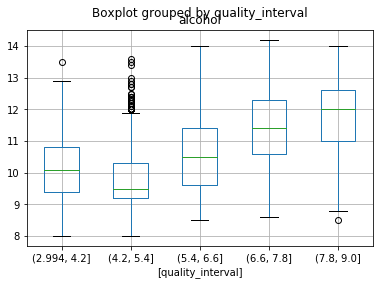

In [24]:
data.boxplot(column = ['alcohol'] , by=['quality_interval'])

we find generally that the larger alcohol percent the larger the quality score despite somehow high alcohol median in quality 3 and 4 but these are less frequent we have only 20 cases of quality 4 and 163 cases of quality 4 but this causes the low correlation and low R-squaled when we run LM let’s check more using correlation test

we also confirm that by plotting scaterplot with smoothing line between quality and alcohol.

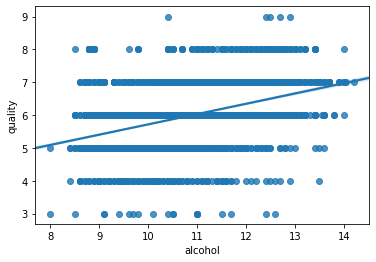

In [25]:
sns.regplot(data['alcohol'] , data['quality'])

let's explore if correlation between quality and alcohol is significant.

In [26]:
stats.pearsonr(data['alcohol'] , data['quality'])

(0.4355747154613733, 5.614770253759131e-226)

so we have a  positive relationship between alcohol and quality despite it appears moderate but the line clarifies that it is positive

####2- Quality vs Destiny

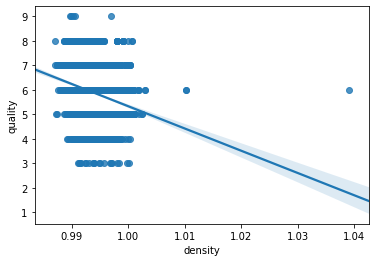

In [27]:
sns.regplot(data['density'] , data['quality'])

In [28]:
stats.pearsonr(data['density'] , data['quality'])

(-0.30712331273472987, 1.727987871174505e-107)

we find it negative correlation coeffecient with a good significance 

####3- Quality vs Chlorides

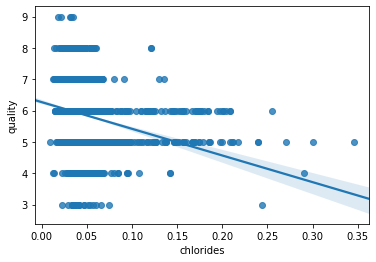

In [29]:
sns.regplot(data['chlorides'] , data['quality'])

In [30]:
stats.pearsonr(data['chlorides'] , data['quality'])

(-0.20993441094676063, 6.506541750136821e-50)

### After that , let's explore correlation between independent variables to cgheck if there is collinearity that we need to get rid of before modeling.

as clear from correlation matrix the negative coeffecient we see that relation is generally negative between destiny and quality



#### 4- Alcohol vs Density

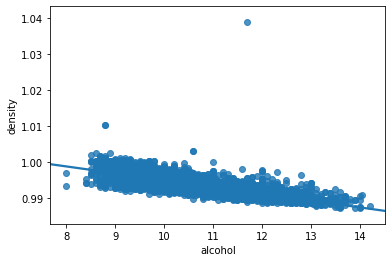

In [33]:
sns.regplot(data['alcohol'] , data['density'])

In [34]:
stats.pearsonr(data['alcohol'] , data['density'])

(-0.780137621425558, 0.0)

####4- Alcohol vs Residual sugar correlation

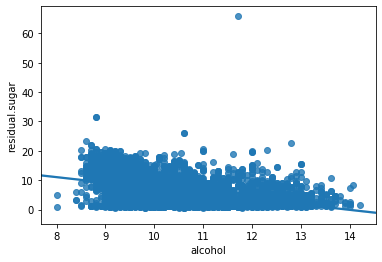

In [31]:
sns.regplot(data['alcohol'] , data['residual.sugar'])

In [32]:
stats.pearsonr(data['alcohol'] , data['residual.sugar'])

(-0.45063122203172895, 1.206209266154971e-243)

there is a negative significant coeffecient between residual sugar and alchohol



we see a significant large negative correlation between density and alcohol we can even notice that from the positive relation between quality and alcohol and the negative between quality and density this is also will affect the linear model later

6- Alcohol vs chlorides

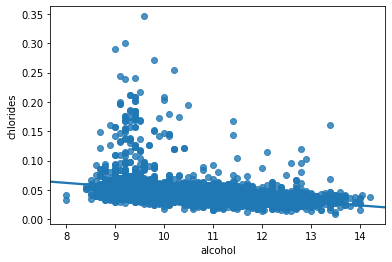

In [35]:
sns.regplot(data['alcohol'] , data['chlorides'])

In [36]:
stats.pearsonr(data['alcohol'] , data['chlorides'])

(-0.3601887121081628, 5.830149568793804e-150)

so here we have a significant moderate negative correlation.

#### 7- Density vs Residual sugar

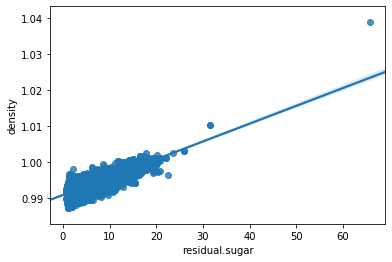

In [37]:
sns.regplot(data['residual.sugar'] , data['density'])

In [38]:
stats.pearsonr(data['residual.sugar'] , data['density'])

(0.8389664549045833, 0.0)

assuring the concluded from the plot we have also a strong signifiacnt positive correlation coeffecient so later if we tried adding it to the linear model it becomes non significant

#### 8 - Density vs total_sulfur_dioxide

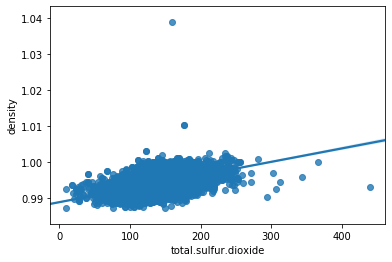

In [39]:
sns.regplot(data['total.sulfur.dioxide'] , data['density'])

In [40]:
stats.pearsonr(data['total.sulfur.dioxide'] , data['density'])

(0.5298813238786105, 0.0)

we see here an average significant positive correlation coeffecient means the higher density the higher total sulfur dioxide

### and we keep doing that for each notable correlation coeffecient in the data,
### for breifing purpose , we stop here regarding bivariate exploratory data , analysis

### General notes regarding Bivariate analysis.


from the above plots, summaries and tests we conclude that
independent variables have more relation between each other then with
the dependent variable (quality) which only has significant relationship with
2 variables only , we detect from that the collinearity problem.


which violates an important assumption in linear regression
to sum up pair correlations, we have 2 variable have significant correlation with quality
;alcohol positively and density negatively , generally more variables correlate
positively with density (residual sugar, total sulfur dioside,chlorides), than alcohol with only (pH)

## Multivariate Plots Section


we first make quality interval of 3 intervals for better visualization.

In [0]:
data['quality_interval'] = pd.cut(data['quality'],3)

###Pair plot:
pair plot shows a clear and nice view of all variables and their relationship with all other variables.

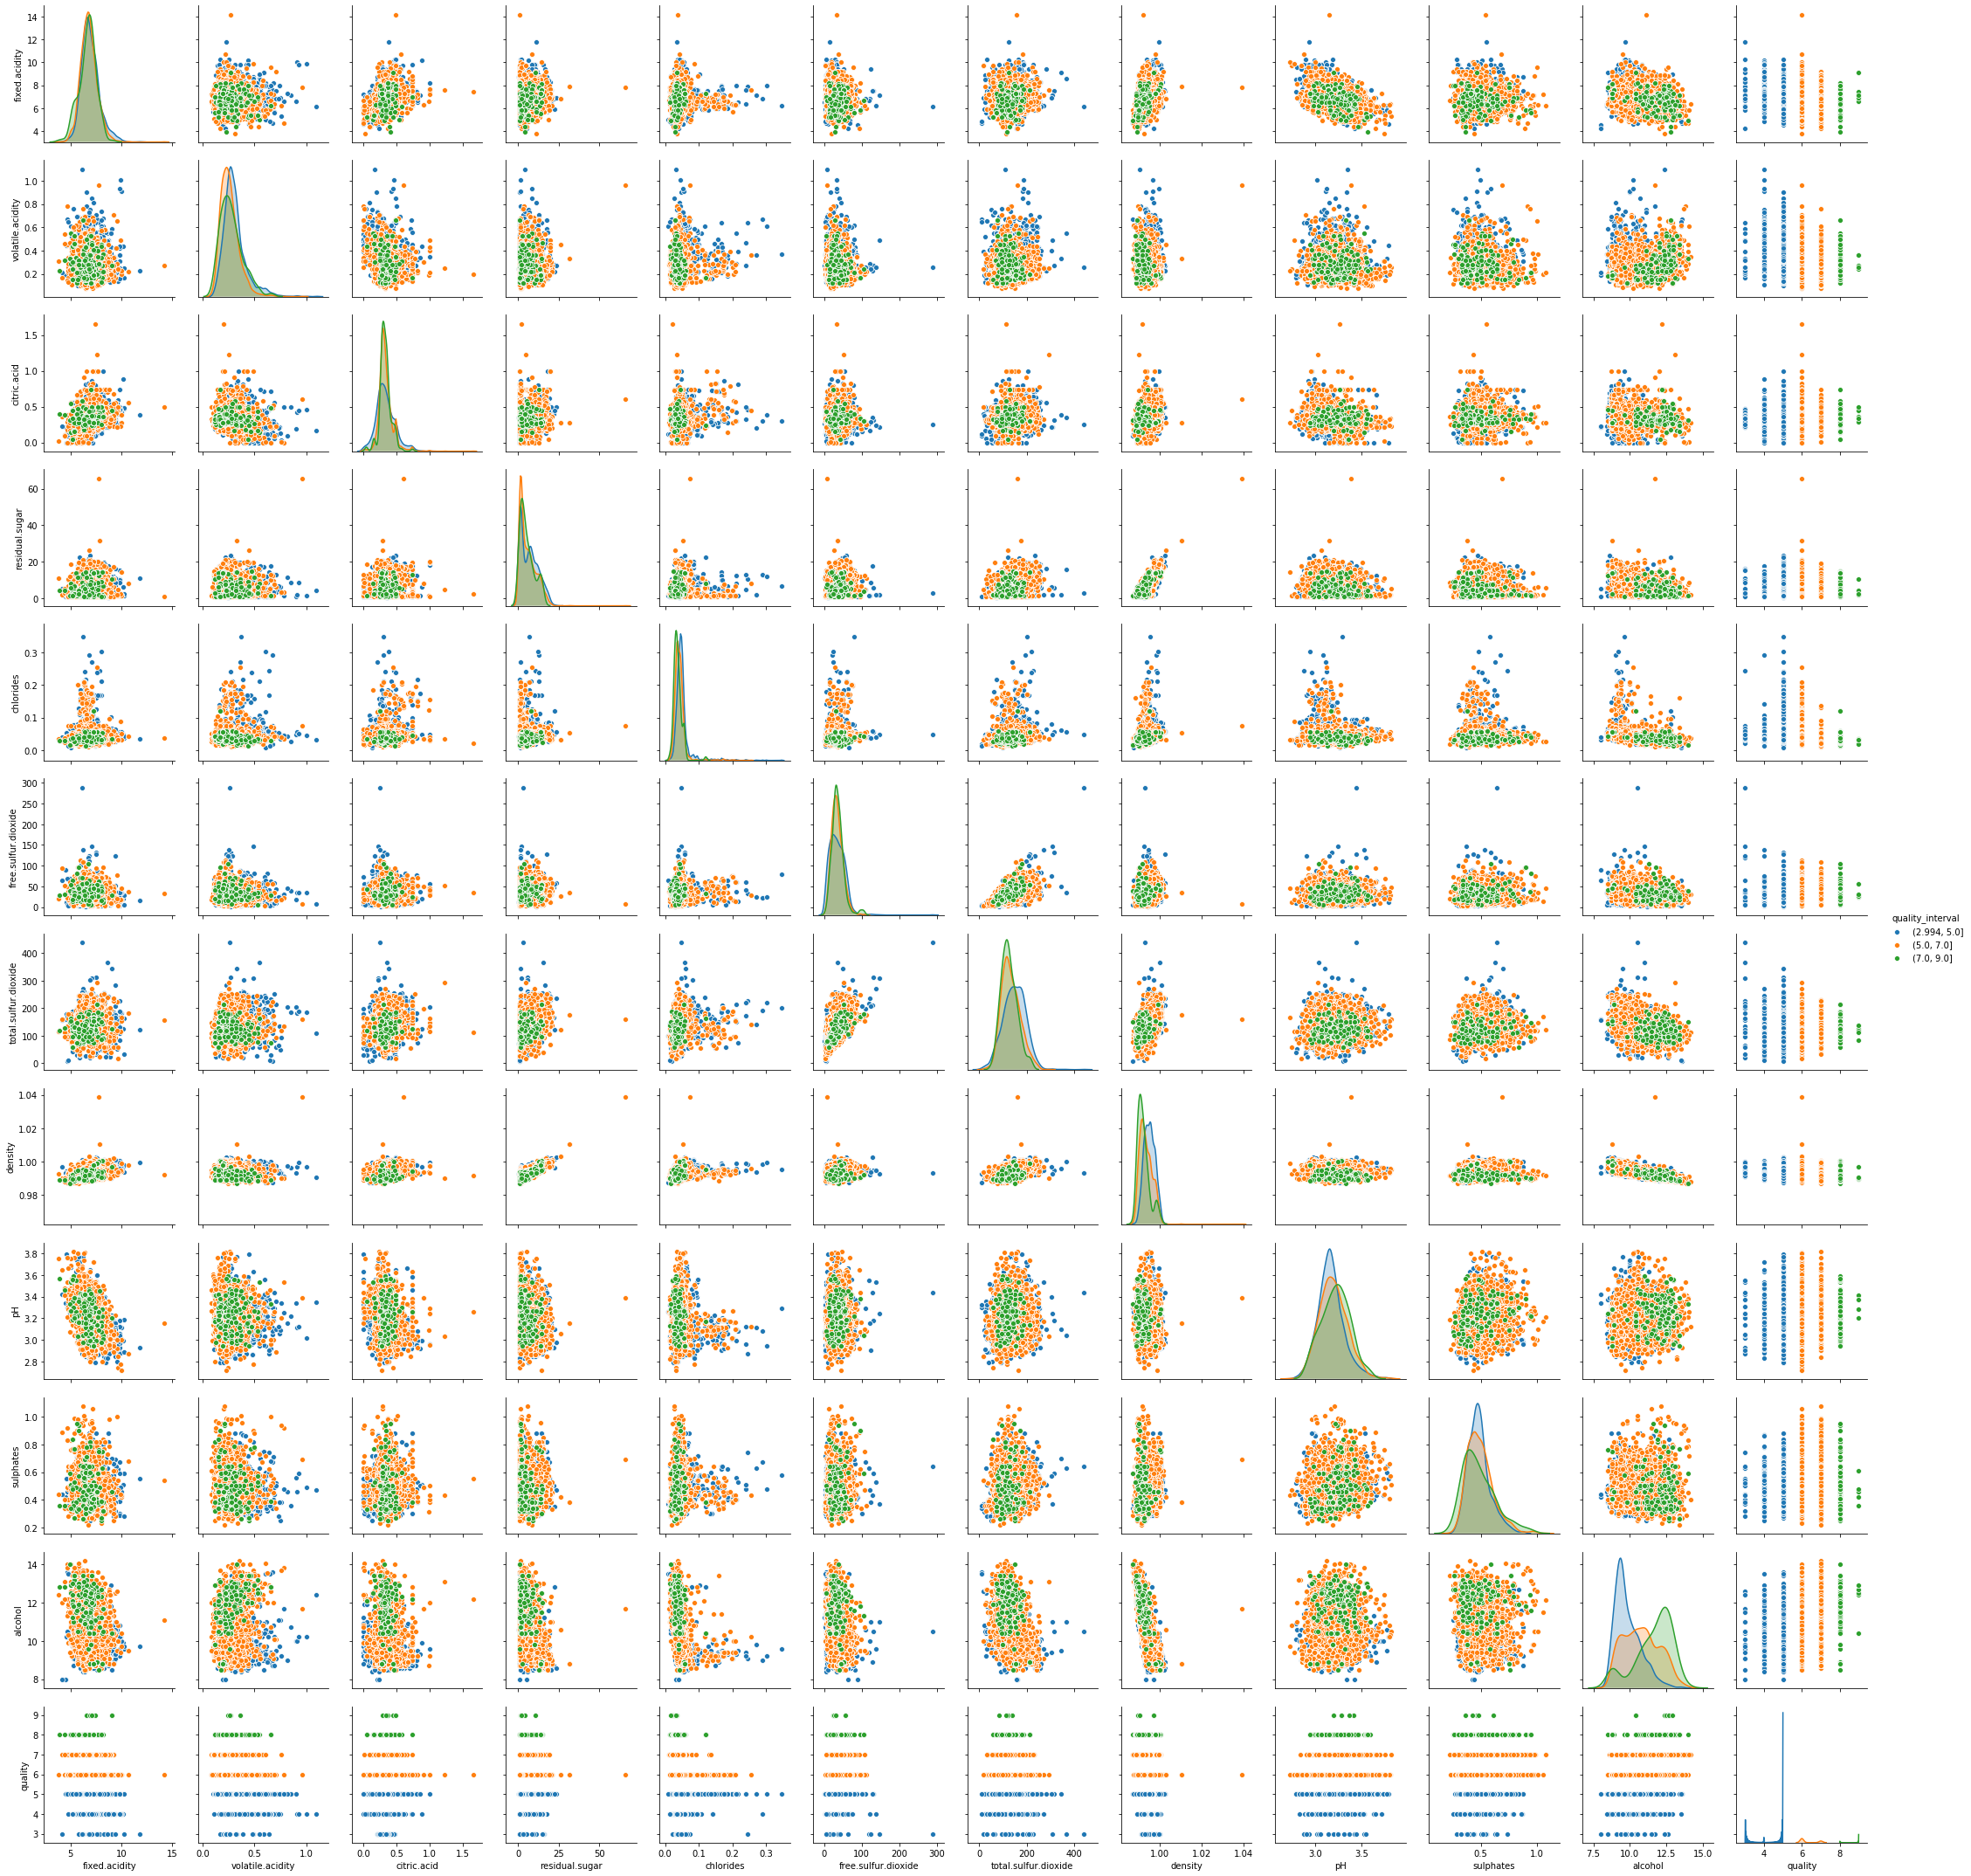

In [42]:
sns.pairplot(data , hue='quality_interval')

#### From the above matrix , and bivariate analysis , we see that the most correlated variables with our target (Quality) are (alcohol, density , and quality) so we make our multivariate analysis between each 2 of them and quality.

###1- Alcohol, Density on Quality

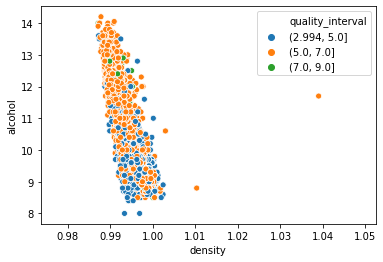

In [43]:
sns.scatterplot(x="density", y="alcohol", hue="quality_interval", data=data )

the plot above demonstrate stated before that the higher density the lower alcohol percentages as well we see the green, orange points (higher quality) are more in the top left of the chart which represents higher alcohol and lower density

####2- Density , chlorides on quality 

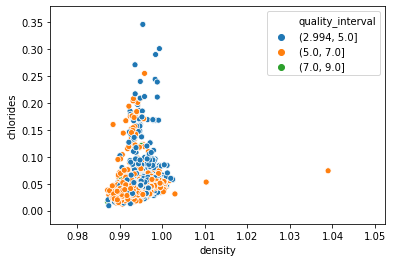

In [44]:
sns.scatterplot(x="density", y="chlorides", hue="quality_interval", data=data )

the plot above demonstrate stated before that the higher density the higher chlorides percentages as well we see the green, orange points (higher quality) are more in the bottom left of the chart which represents lower chlorides and lower density

####3- Alcohol , chlorides on quality:

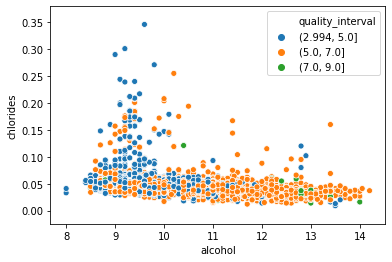

In [45]:
sns.scatterplot(x="alcohol", y="chlorides", hue="quality_interval", data=data )

the plot above demonstrate stated before that the lower alcohol the higher chlorides percentages as well we see the green, orange points (higher quality) are more in the bottom right of the chart which represents lower chlorides and higher alcohol

##D- Model building:

From the above steps , we conclude that the most effective columns on quality are , as we stated in previous step, alcohol, density , and chlorides.

Since Quality is an ordinal variables , we don't use linear regression , instead we use extra tree classifier

So we form a basic  model includes all these variables as predictors , and quality as target , since quality is a  as follows

In [0]:
X=data.loc[: , ['alcohol','density','chlorides']]

In [0]:
Y=data['quality']

In [48]:

X2 = sm.add_constant(X)
est = sm.OLS(Y, X)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                          8.953e+04
Date:                Sun, 12 Jan 2020   Prob (F-statistic):                        0.00
Time:                        14:00:17   Log-Likelihood:                         -5827.9
No. Observations:                4898   AIC:                                  1.166e+04
Df Residuals:                    4895   BIC:                                  1.168e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------